# Training Models

## Linear Regression Model 
## Two training methods
### 1: "Closed-form equation" directly computes the model parameters that best fit the model to the training set
### 2: Iterative optimization approach gradually tweaks model parameters to minimize cost function over training set

# How to minimize MSE?

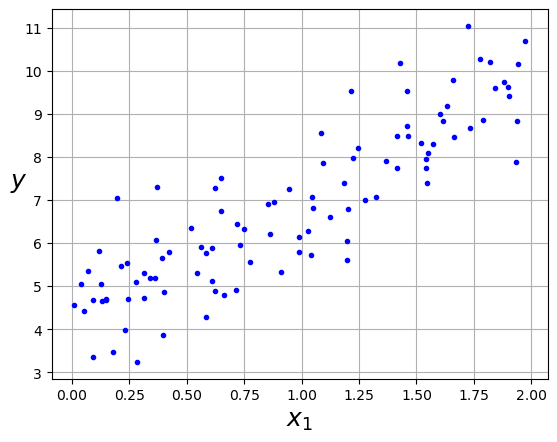

In [1]:
# generate linear-looking data to test normal equation
import numpy as np

np.random.seed(42) # make example reproducible
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

# plot data
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## Compute theta using Normal equation. Use inv() function from NumPy's linear algebra module (np.linalg) to compute inverse of matrix, and dot() method for matrix multiplication.

In [2]:
!pip install scikit-learn

In [3]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
# print result of theta_best
theta_best

array([[4.21509616],
       [2.77011339]])

## The function used to generate the data is y = 4 + 3x + gaussian noise. However, the values returned were y = 4.215 + 2.770. 
## Close enough, but the noise made it impossible to get the exact parameters. The smaller and noisier the dataset, the harder it gets.
## But, predictions can still be made using theta.

In [5]:
# make predictions using theta
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

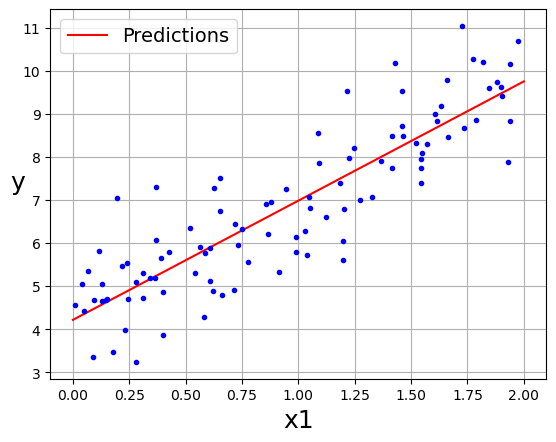

In [6]:
# plot the model's predictions
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
# beautify the graph: add labels, legend, and grid
plt.grid(True)
plt.xlabel("x1", fontsize=18)
plt.ylabel("y", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [7]:
# perform linear regression using scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## The LinearRegression class is based on the scipy.linalg.lstsq() function "least squares".
## The function computes the psuedoinverse of X.

In [9]:
# call the least squares function directly
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

## The psuedoinverse of X could also be computed directly using np.linalg.pinv().

In [10]:
# compute psuedoinverse directly using np.linalg.pinv()
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## The psuedoinverse is computed using a standard matrix factorization technique called singular value decomposition.
## This technique decomposes the training set matrix into matrix multiplication of three matrices.
## For cases where there are a large number of features or too many training instances, gradient descent is used to optimize the linear regression model. The example is seen below.

# Gradient Descent
## Main idea: tweak parameters iteratively to minimize the cost function.
## In practice, theta is randomly initialized. Then it is improved gradually until the algorithm converges at a minimum.
## The size of the steps is determined by the learning rate hyperparameter. If the learning rate is too small, the algorithm will take a long time going through many iterations to converge.
## If the learning rate is too high, the algorithm will diverge with larger values.
## Additionally, some cost functions may have ridges, plateaus, and other irregular terrain. The trouble with this is that the algorithm might converge to a local minimum instead of the global minimum. 
## The good news is that for a linear regression model, the cost function will be convex.
## To implement gradient descent, the gradient of the cost function with regard to each model parameter must be computed (partial derivatives).

In [11]:
# implement gradient descent step
eta = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # number of instances

np.random.seed(42) # ensures data is reproducible
theta = np.random.randn(2, 1) # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [12]:
# look at resulting theta
theta

array([[4.21509616],
       [2.77011339]])

In [13]:
# compare with normal equation
theta_best

array([[4.21509616],
       [2.77011339]])

## When comparing with the normal equation, the results are exactly the same. Therefore, the gradient descent worked perfectly.

# What if a different learning rate is used?
## It may lead to underfititng or overfitting.
## Therefore, to find a good learning rate, grid search can be used. However, the number of epochs may be limited so that grid search can eliminate models taking too long to converge.
## The limitation of batch gradient descent is that since it uses the whole training set to compute the gradients at every step, it can take a very long time if the training set is large. Therefore, stochastic gradient descent (SGD) could be used in that instance.

# Stochastic Gradient Descent
## Picks a random instance in the training set at every step and computes gradients based only on that single instance.
## Although working on a single instance at a time makes the algorithm faster, it will also be less regular.
## However, when the cost function is irregular, there is a better chance of finding the global minimum compared to batch gradient descent.

In [17]:
theta_path_sgd = [] # store path of theta in parameter space to plot figure

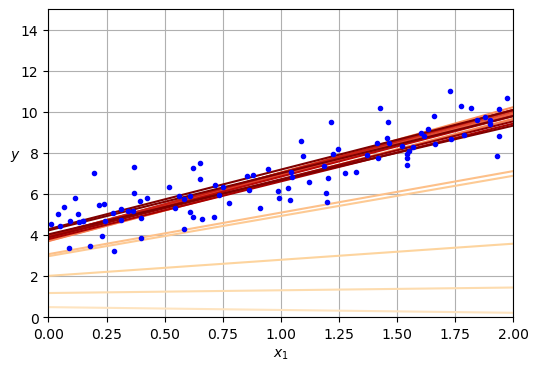

In [18]:
import matplotlib as mpl
# implement SGD using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization 

n_shown = 20 # generates figure
plt.figure(figsize=(6, 4)) # formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [19]:
# return result of theta
theta

array([[4.21076011],
       [2.74856079]])

## As instances are picked randomly, the steps are irregular. 
## Performing linear regression using stochastic GD with scikit-learn is also possible with the SGDRegressor class.

In [22]:
# perform linear regression with SGDRegressor
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [23]:
# print solution
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [24]:
# compare with normal equation
theta_best

array([[4.21509616],
       [2.77011339]])

## As seen from above, using sgd_reg prints out a similar solution returned by the normal equation.

# Mini-Batch Gradient Descent
## Instead of computing the gradients based on full training set (batch GD) or from one instance (stochastic GD), it computes the gradients on small random sets of instances called mini-batches.
## Advantage: performance boost possible from hardware optimization of matrix operatures, especially when using GPU's.
## Disadvantage: takes a lot of time to take each step.
## If data is non-linear, it is still possible to use a linear model. The way is to add powers of each feature as new features, then train a linear model on this extended set of features (polynomial regression).

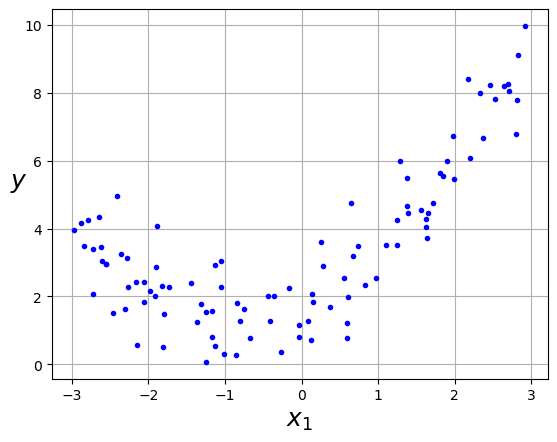

In [25]:
# generate nonlinear data based on a simple quadratic equation
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# plot data
plt.plot(X, y, "b.")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

## Since a straight line clearly cannot fit this data, use Scikit-Learn's PolynomialFeatures class to transform training data.

In [27]:
# fit data using PolynomialFeatures class
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [28]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

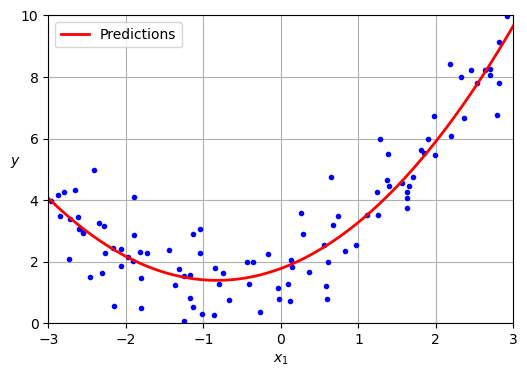

In [31]:
# plot data with linear regression model
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid(True)
plt.show()

## This model estimates y = 0.56x^2 + 0.93x + 1.78.
## Original function y = 0.5x^2 + 1.0x + 2.0.

# Learning Curves

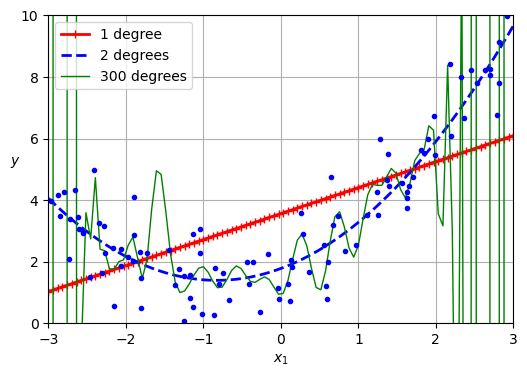

In [32]:
# demonstrate difference between underfitting and overfitting
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

## The high-degree polynomial regression model overfits the training data, while the linear model is underfitting it.

# How to tell if model is overfitting or underfitting the data?
## Look at learning curves. Scikit-Learn has a useful learning_curve() function that does just that. It works by training and evaluating the model using cross-validation.

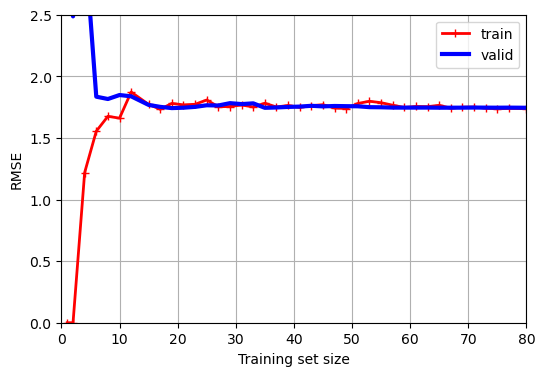

In [34]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
plt.show()

## The graph above indicates that the linear model is underfitting.
## When there are just 1-2 instances in the training set, the model fits them perfectly. However, as more instances are added, it becomes impossible for the model to fit the training data perfectly. Eventually, once there are around 10-20 instances, the error reaches a plateau.
## For the validation error, when the model is trained on very few instances, the RMSE is high meaning that the model is incapable of generalizing properly. However, with more instances, the validation error gradually goes down until it also reaches a plateau.

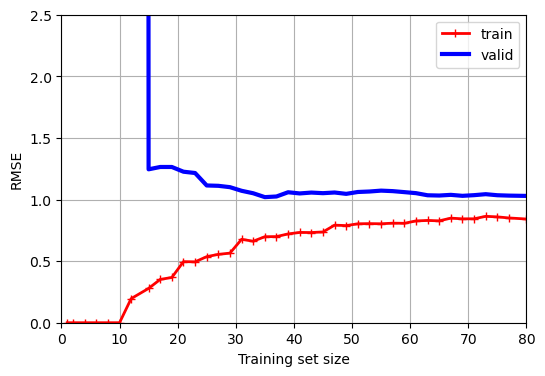

In [35]:
# look at learning curve of a 10th-degree polynomial model 
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
plt.show()
